In [22]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression



In [12]:
quandl.ApiConfig.api_key = 'jMaJ3W9QVE4hzDZsA1xB'

df = quandl.get("WIKI/AMZN")
df = df [['Adj. Close']]


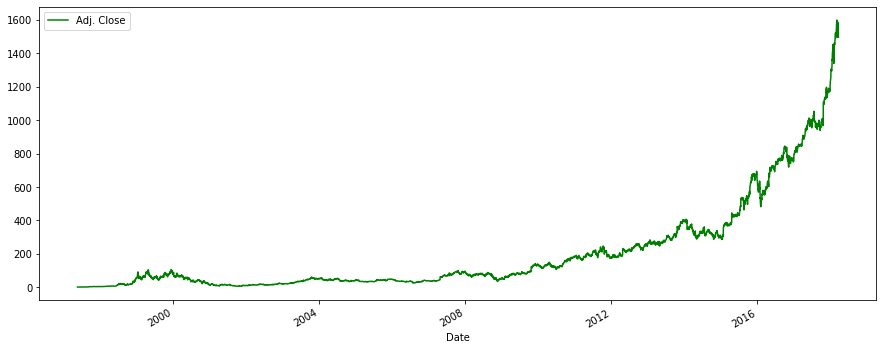

In [14]:
df['Adj. Close'].plot(figsize=(15,6), color = 'g')
plt.legend(loc='upper left')
plt.show()

In [15]:
forecast = 730
df['Prediction'] = df [['Adj. Close']].shift(-forecast)


X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1072.55968553 1073.00882401 1068.12114059 1062.59937932 1083.15406959
 1101.14602855 1098.92675608 1094.09191248 1083.12764968 1097.42082119
 1080.82911748 1078.82120429 1069.49497593 1075.17525666 1095.70352702
 1085.13556287 1079.42886223 1095.1487089  1082.33505237 1089.36274853
 1093.82771338 1094.01265275 1108.80780256 1093.45783463 1083.33900896
 1074.22413988 1079.45528214 1093.43141472 1099.24379501 1091.18572234
 1074.67327836 1084.15802618 1085.61112125 1116.20537746 1104.39567753
 1108.01520525 1133.64251831 1120.03626447 1118.0811911  1112.79720903
 1091.02720288 1102.20282497 1110.92139539 1111.76683252 1107.35470749
 1109.1512614  1090.60448431 1102.99542228 1127.09038054 1158.95279245
 1185.37270282 1173.80078208 1211.554834   1231.44902651 1244.89676089
 1244.63256178 1245.34589936 1229.25617395 1354.06383054 1359.32139271
 1345.10748093 1352.95419431 1373.45604476 1371.84443022 1368.88540026
 1360.61596832 1374.11654252 1354.16951018 1336.09829149 1339.74423912
 1348.

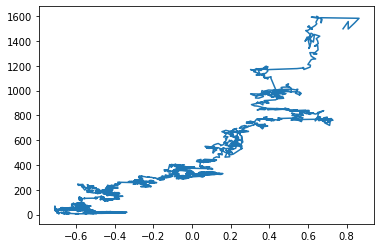

In [17]:
plt.plot(X,y)

(17251.0, 18764.5)

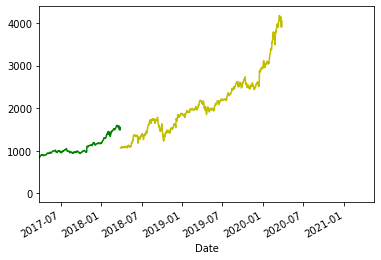

In [25]:
dates = pd.date_range(start="2018-03-28", end="2020-03-26")
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,3,26))